**English data Pre-processing**

In [1]:
import pandas as mulgul_engpd
from google.colab import drive
drive.mount('/content/drive')

mulgul_eng = mulgul_engpd.read_csv('/content/drive/MyDrive/MLTLNGL Fakenews Detection /Code/WELFake_Dataset.csv')
mulgul_eng

Mounted at /content/drive


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [2]:
mulgul_eng['text'][:20]

0     No comment is expected from Barack Obama Membe...
1        Did they post their votes for Hillary already?
2      Now, most of the demonstrators gathered last ...
3     A dozen politically active pastors came here f...
4     The RS-28 Sarmat missile, dubbed Satan 2, will...
5     All we can say on this one is it s about time ...
6     DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...
7                                                      
8     The owner of the Ringling Bar, located south o...
9     FILE – In this Sept. 15, 2005 file photo, the ...
10    The most punchable Alt-Right Nazi on the inter...
11    BRUSSELS (Reuters) - British Prime Minister Th...
12    WASHINGTON (Reuters) - Charles Schumer, the to...
13    After watching this telling video, you ll wond...
14    As more and more sports fans turn off ESPN to ...
15    RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...
16    Europe is likely not going to be a top destina...
17    GENEVA (Reuters) - The United Nations call

In [3]:
mulgul_eng['label'][:20]

0     1
1     1
2     1
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    1
14    0
15    0
16    1
17    0
18    1
19    0
Name: label, dtype: int64

In [4]:
mulgul_eng['label'].value_counts()

1    37106
0    35028
Name: label, dtype: int64

* 0 = fake news, and 1 = real news

In [5]:
mulgul_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


[Text(0.5, 1.0, 'label of different news')]

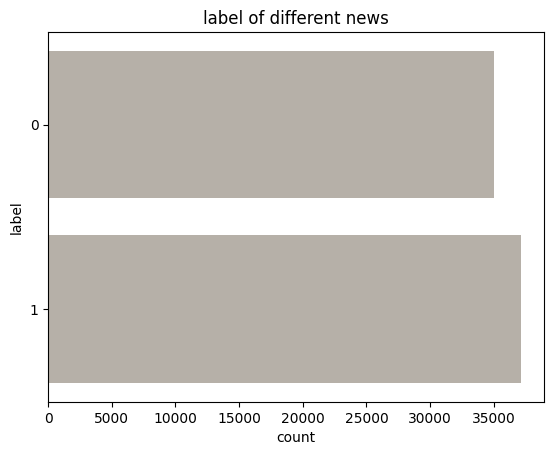

In [6]:
import seaborn as mulgul_engobe
import matplotlib.pyplot as mulgul_engita
mulgul_engita_Q= mulgul_engobe.countplot(y ='label', data = mulgul_eng, color='tan', saturation= 0.2)
mulgul_engita_Q.set(title ='label of different news')

real kind of news are high.

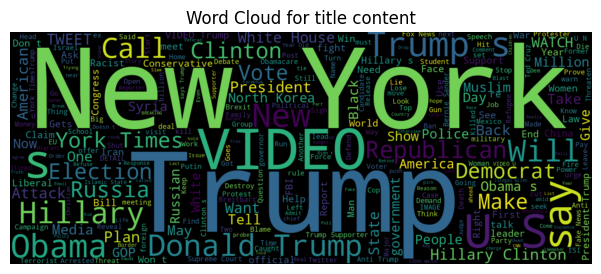

In [8]:
from wordcloud import WordCloud
mulgul_eng['title'].fillna('',inplace=True)
#word cloud for the 'title' column
content=''.join(mulgul_eng['title'])
content_wc=WordCloud(width=1500, height=600, max_words=300).generate(content)
mulgul_engita.figure(figsize=(7.5,11))
mulgul_engita.imshow(content_wc,interpolation='bilinear')
mulgul_engita.axis('off')
mulgul_engita.title('Word Cloud for title content')
mulgul_engita.show()


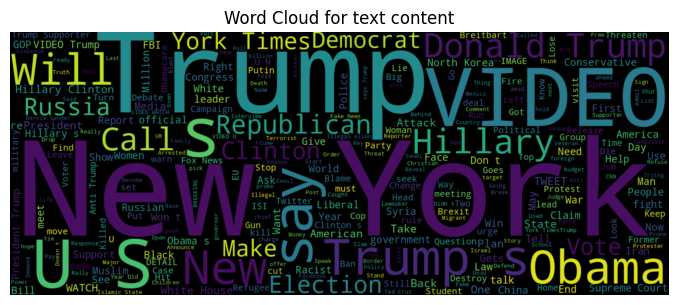

In [11]:
from wordcloud import WordCloud
mulgul_eng['text'].fillna('',inplace=True)
#word cloud for the 'text' column
content=''.join(mulgul_eng['text'])
content_wc=WordCloud(width=1500, height=600, max_words=300).generate(content)
mulgul_engita.figure(figsize=(8.5,13))
mulgul_engita.imshow(content_wc,interpolation='bilinear')
mulgul_engita.axis('off')
mulgul_engita.title('Word Cloud for text content')
mulgul_engita.show()




Data processing

In [12]:
del mulgul_eng['Unnamed: 0']
del mulgul_eng['title']
mulgul_eng.shape

(72134, 2)

Null rejection

In [13]:
mulgul_eng.isna().any()

text     False
label    False
dtype: bool

In [14]:
mulgul_eng.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
mulgul_eng.dropna(inplace=True)
mulgul_eng.shape

(72134, 2)

Duplicate rejection

In [16]:
mulgul_eng[mulgul_eng.duplicated()]

,text,label
106,,1
325,,1
364,,1
512,,1
514,,1
...,...,...
72118,CNN political hack Alison Camarota wants to na...,1
72119,,1
72125,,1
72128,Judge Jeanine lets it rip! She s concerned wit...,1


In [17]:
mulgul_eng= mulgul_eng.drop_duplicates()
mulgul_eng.shape

(62720, 2)

In [18]:
mulgul_eng

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...
72127,An email released by WikiLeaks on Sunday appea...,1
72129,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0


NLP procedure

In [19]:
import nltk as mulgul_engnlptk
mulgul_engnlptk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
import regex as mulgul_engnlprrx
from nltk.corpus import stopwords as mulgul_engnlpwrk

In [21]:
mulgul_engnlpwrk_Q = mulgul_engnlpwrk.words('english')
mulgul_engnlpwrk_Q #### stopwords in english

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
def mulgul(lge):
    lge = lge.lower()
    lge = mulgul_engnlprrx.sub("[^a-z]+", " ", lge)
    lge = " ".join([gul for gul in lge.split() if gul not in mulgul_engnlpwrk_Q])
    return lge

In [23]:
english_vl =[]
for d in mulgul_eng['text']:
    english_vl.append(mulgul(d))
mulgul_eng['text']=english_vl
mulgul_eng['text']

<ipython-input-23-ef8bd9966b44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mulgul_eng['text']=english_vl


0        comment expected barack obama members fyf fuky...
1                               post votes hillary already
2        demonstrators gathered last night exercising c...
3        dozen politically active pastors came private ...
4        rs sarmat missile dubbed satan replace ss flie...
                               ...                        
72127    email released wikileaks sunday appears show f...
72129    washington reuters hackers believed working ru...
72130    know fantasyland republicans never questioned ...
72131    migrants refuse leave train refugee camp hunga...
72132    mexico city reuters donald trump combative sty...
Name: text, Length: 62720, dtype: object

In [24]:
mulgul_eng.to_csv('mulgul_eng.csv', index=False)

In [25]:
mulgul_eng

,text,label
0,comment expected barack obama members fyf fuky...,1
1,post votes hillary already,1
2,demonstrators gathered last night exercising c...,1
3,dozen politically active pastors came private ...,0
4,rs sarmat missile dubbed satan replace ss flie...,1
...,...,...
72127,email released wikileaks sunday appears show f...,1
72129,washington reuters hackers believed working ru...,0
72130,know fantasyland republicans never questioned ...,1
72131,migrants refuse leave train refugee camp hunga...,0


**German data Pre-processing**

In [26]:
import pandas as mulgul_gerpd
from google.colab import drive
drive.mount('/content/drive')

mulgul_ger = mulgul_gerpd.read_csv('/content/drive/MyDrive/MLTLNGL Fakenews Detection /Code/news.csv')
mulgul_ger

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,url,Titel,Body,Kategorie,Datum,Quelle,Fake,Art
0,773233,http://www.der-postillon.com/2018/01/grokoleak...,Exklusiv! Das geheime WhatsApp-Chat-Protokoll ...,Die Sondierungsgespräche zwischen Union und SP...,wirtschaft,2018-01-18 00:00:00,Postillion,1,NaN
1,773234,http://www.der-postillon.com/2018/01/trump-san...,"Trump droht, jeden zu verspeisen, der an seine...",Nun ist es auch medizinisch offiziell bestätig...,wirtschaft,2018-01-17 00:00:00,Postillion,1,NaN
2,773235,http://www.der-postillon.com/2018/01/fdp-sondi...,"Soli runter, keine Steuererhöhungen, kein Klim...","Es waren zähe Verhandlungen, doch die Freien D...",wirtschaft,2018-01-12 00:00:00,Postillion,1,NaN
3,773236,http://www.der-postillon.com/2018/01/joachim-s...,Hat sie eine Affäre? Joachim Sauer glaubt Ange...,Wo treibt sie sich immer bis spät in die Nacht...,wirtschaft,2018-01-09 00:00:00,Postillion,1,NaN
4,773237,http://www.der-postillon.com/2018/01/halb-so-s...,"""Er hat ja nur HALBneger gesagt"": So begründet...",Der Parteivorstand drückt nochmal ein Auge zu:...,wirtschaft,2018-01-08 00:00:00,Postillion,1,NaN
...,...,...,...,...,...,...,...,...,...
63863,838144,http://www.kleinezeitung.at//international/537...,Lehrer entging durch Hochzeit mit Schülerin Ve...,55-Jähriger muss nach Sex mit damals 15-Jährig...,International,2018-02-26 00:00:00,Kleine,0,NaN
63864,838145,http://www.kleinezeitung.at//wirtschaft/wirtsc...,Warum die Taiwaner Toilettenpapier bunkern,Aus Angst vor Preiserhöhungen bei Klopapier ka...,Wirtschaft,2018-02-26 00:00:00,Kleine,0,NaN
63865,838146,http://www.kleinezeitung.at//wirtschaft/wirtsc...,Warum die Taiwaner Toilettenpapier bunkern,Aus Angst vor Preiserhöhungen bei Klopapier ka...,Wirtschaft,2018-02-26 00:00:00,Kleine,0,NaN
63866,838147,http://www.kleinezeitung.at//wirtschaft/wirtsc...,\r\nDie neue Premium-Klasse von Samsung\r\n ...,Am Vorabend der Eröffnung des Mobile World Con...,Wirtschaft,2018-02-25 00:00:00,Kleine,0,NaN


In [27]:
mulgul_ger['Body'][:20]

0     Die Sondierungsgespräche zwischen Union und SP...
1     Nun ist es auch medizinisch offiziell bestätig...
2     Es waren zähe Verhandlungen, doch die Freien D...
3     Wo treibt sie sich immer bis spät in die Nacht...
4     Der Parteivorstand drückt nochmal ein Auge zu:...
5     Im Atomstreit mit Nordkorea hat US-Präsident T...
6     Kurswechsel bei den freien Demokraten: FDP-Che...
7     Sozialverbände in Deutschland schlagen Alarm. ...
8     Dramatische Szenen auf dem SPD-Parteitag in Be...
9     Politisches Beben in Berlin! Viele Beobachter ...
10    Nur kurz nach seinem Beschluss, die US-Botscha...
11    Nun könnte sie doch fortgesetzt werden – die G...
12    In Bayern neigt sich die Ära Seehofer dem Ende...
13    Nun beginnt es also, das unwürdige Ringen um d...
14    Nach seiner umstrittenen Glyphosat-Entscheidun...
15    Nach so einer Großtat darf schon mal gefeiert ...
16    Jetzt hat er sie genau da, wo er sie haben wol...
17    Das wird nicht billig! Großkonzerne und In

In [28]:
mulgul_ger['Fake'][:20]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Fake, dtype: int64

In [29]:
mulgul_ger['Fake'].value_counts()

0    59241
1     4627
Name: Fake, dtype: int64

* 0 = fake news, and 1 = real news

In [30]:
mulgul_ger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63868 entries, 0 to 63867
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         63868 non-null  int64 
 1   url        63868 non-null  object
 2   Titel      63868 non-null  object
 3   Body       63868 non-null  object
 4   Kategorie  62546 non-null  object
 5   Datum      63868 non-null  object
 6   Quelle     63868 non-null  object
 7   Fake       63868 non-null  int64 
 8   Art        22896 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.4+ MB


[Text(0.5, 1.0, 'label of different news')]

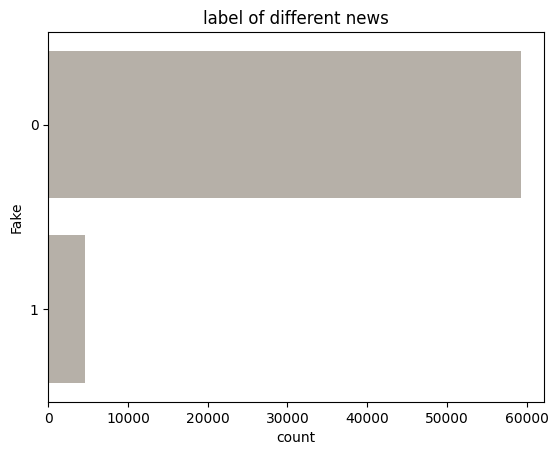

In [31]:
import seaborn as mulgul_engobe
import matplotlib.pyplot as mulgul_engita
mulgul_engita_Q= mulgul_engobe.countplot(y ='Fake', data = mulgul_ger, color='tan', saturation= 0.2)
mulgul_engita_Q.set(title ='label of different news')

fake kind of news are high.

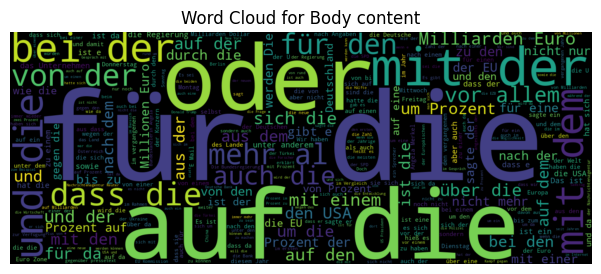

In [34]:
from wordcloud import WordCloud
mulgul_ger['Body'].fillna('',inplace=True)
#word cloud for the 'Body' column
content=''.join(mulgul_ger['Body'])
content_wc=WordCloud(width=1500, height=600, max_words=300).generate(content)
mulgul_engita.figure(figsize=(7.5,11))
mulgul_engita.imshow(content_wc,interpolation='bilinear')
mulgul_engita.axis('off')
mulgul_engita.title('Word Cloud for Body content')
mulgul_engita.show()

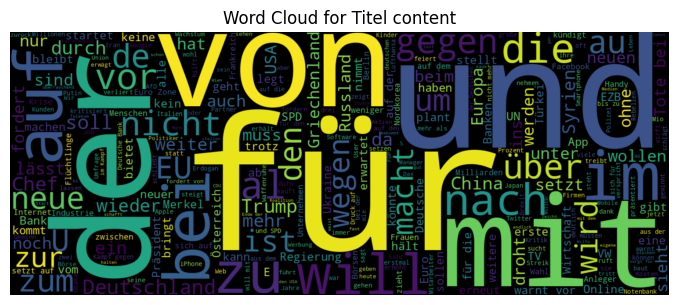

In [37]:
mulgul_ger['Titel'].fillna('',inplace=True)
#word cloud for the 'Title' column
content=''.join(mulgul_ger['Titel'])
content_wc=WordCloud(width=1500, height=600, max_words=300).generate(content)
mulgul_engita.figure(figsize=(8.5,13))
mulgul_engita.imshow(content_wc,interpolation='bilinear')
mulgul_engita.axis('off')
mulgul_engita.title('Word Cloud for Titel content')
mulgul_engita.show()

Data processing

In [38]:
del mulgul_ger['id']
del mulgul_ger['url']
del mulgul_ger['Titel']
del mulgul_ger['Kategorie']
del mulgul_ger['Datum']
del mulgul_ger['Quelle']
del mulgul_ger['Art']
mulgul_ger.shape

(63868, 2)

Null rejection

In [39]:
mulgul_ger.isna().any()

Body    False
Fake    False
dtype: bool

Duplicate rejection

In [40]:
mulgul_ger[mulgul_ger.duplicated()]

,Body,Fake
2180,Unions-Fraktionschef Volker Kauder hat sich ge...,0
2217,Union und SPD wollen das Kooperationsverbot in...,0
2301,"Die Sondierer von CDU, CSU und SPD haben bei F...",0
2351,Der britische Billigflieger Easyjet will nach ...,0
2366,US-Präsident Donald Trump versucht seinen Ex-C...,0
...,...,...
63859,Die Übertragung des Balles im Fernsehen dürfte...,0
63860,Kretschmer und der zehn Jahre ältere Mutters l...,0
63861,"Der Vorname ""Stormi"" kam bei ihren Fans gut an...",0
63862,Schwere Vorwürfe gegen Landwirt aus Hüttenberg...,0


In [42]:
mulgul_ger= mulgul_ger.drop_duplicates()
mulgul_ger.shape

(62578, 2)

In [43]:
mulgul_ger

,Body,Fake
0,Die Sondierungsgespräche zwischen Union und SP...,1
1,Nun ist es auch medizinisch offiziell bestätig...,1
2,"Es waren zähe Verhandlungen, doch die Freien D...",1
3,Wo treibt sie sich immer bis spät in die Nacht...,1
4,Der Parteivorstand drückt nochmal ein Auge zu:...,1
...,...,...
63790,Das schwangere Model fühlt sich diesmal aber f...,0
63863,55-Jähriger muss nach Sex mit damals 15-Jährig...,0
63864,Aus Angst vor Preiserhöhungen bei Klopapier ka...,0
63866,Am Vorabend der Eröffnung des Mobile World Con...,0


NLP procedure

In [44]:
import nltk as mulgul_engnlptk
mulgul_engnlptk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
import regex as mulgul_engnlprrx
from nltk.corpus import stopwords as mulgul_engnlpwrk

In [46]:
mulgul_engnlpwrk_Q = mulgul_engnlpwrk.words('german')
mulgul_engnlpwrk_Q #### stopwords in german

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [47]:
def mulgul(lge):
    lge = lge.lower()
    lge = mulgul_engnlprrx.sub("[^a-z]+", " ", lge)
    lge = " ".join([gul for gul in lge.split() if gul not in mulgul_engnlpwrk_Q])
    return lge

In [48]:
english_vl =[]
for d in mulgul_ger['Body']:
    english_vl.append(mulgul(d))
mulgul_ger['Body']=english_vl
mulgul_ger['Body']

<ipython-input-48-a915359c9b2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mulgul_ger['Body']=english_vl


0        sondierungsgespr che union spd endeten komprom...
1        medizinisch offiziell best tigt milit r rztlic...
2        z he verhandlungen freien demokraten k nnen zu...
3        treibt immer sp t nacht herum joachim sauer be...
4        parteivorstand dr ckt nochmal auge nachdem noa...
                               ...                        
63790    schwangere model f hlt diesmal f r probleme ge...
63863    j hriger sex damals j hriger gef ngnis wegen s...
63864    angst preiserh hungen klopapier kaufen verbrau...
63866    vorabend ffnung mobile world congress barcelon...
63867    gustav kuhn k nstlerischer leiter festspiele e...
Name: Body, Length: 62578, dtype: object

In [49]:
mulgul_ger.to_csv('mulgul_german.csv', index=False)

In [50]:
mulgul_ger

,Body,Fake
0,sondierungsgespr che union spd endeten komprom...,1
1,medizinisch offiziell best tigt milit r rztlic...,1
2,z he verhandlungen freien demokraten k nnen zu...,1
3,treibt immer sp t nacht herum joachim sauer be...,1
4,parteivorstand dr ckt nochmal auge nachdem noa...,1
...,...,...
63790,schwangere model f hlt diesmal f r probleme ge...,0
63863,j hriger sex damals j hriger gef ngnis wegen s...,0
63864,angst preiserh hungen klopapier kaufen verbrau...,0
63866,vorabend ffnung mobile world congress barcelon...,0
